In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

In [4]:
server = '20.106.135.81'
user = 'BI_SQL'
password = 'D4t4_$21.5'

In [5]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};SERVER='+server+';UID='+user+';PWD='+password)

In [6]:
query = 'SELECT * FROM BI_TEST.dbo.VW_People_Clean'

In [7]:
#extraer la view
df = pd.read_sql(query, conn)

In [8]:
df.head()

,Year,Age,Area,Ethnic,Sex,count
0,2006,Under 15 years,North Cape,European,Male,57
1,2006,Under 15 years,Rangaunu Harbour,European,Male,141
2,2006,Under 15 years,Inlets Far North District,European,Male,..C
3,2006,Under 15 years,Karikari Peninsula,European,Male,45
4,2006,Under 15 years,Tangonge,European,Male,69


In [9]:
## Clean data
df['#Registro'] = 1

In [10]:
# agrupar por edad
ageDf = df.groupby('Age').sum().reset_index()
# agrupar por area
areaDf = df.groupby('Area').sum().reset_index()
# agrupar por etnia
ethnicDf = df.groupby('Ethnic').sum().reset_index()
# agrupar por sexo
sexDf = df.groupby('Sex').sum().reset_index()

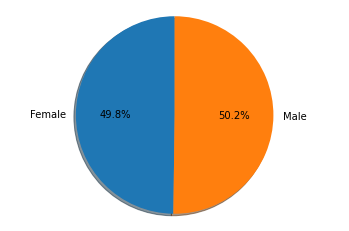

In [14]:
## sex
fig1, ax1 = plt.subplots()
ax1.pie(sexDf['#Registro'], labels=sexDf['Sex'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [19]:
df.to_csv('data.csv')